In [5]:
import matplotlib.pyplot as plt
import seaborn as sns  
import pandas as pd
%matplotlib inline

In [6]:
df = pd.read_csv(r'C:\Users\User\juypter\files\advertising.csv')

# Data overview

In [7]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.shape

(200, 4)

# Exploratory Data Analysis

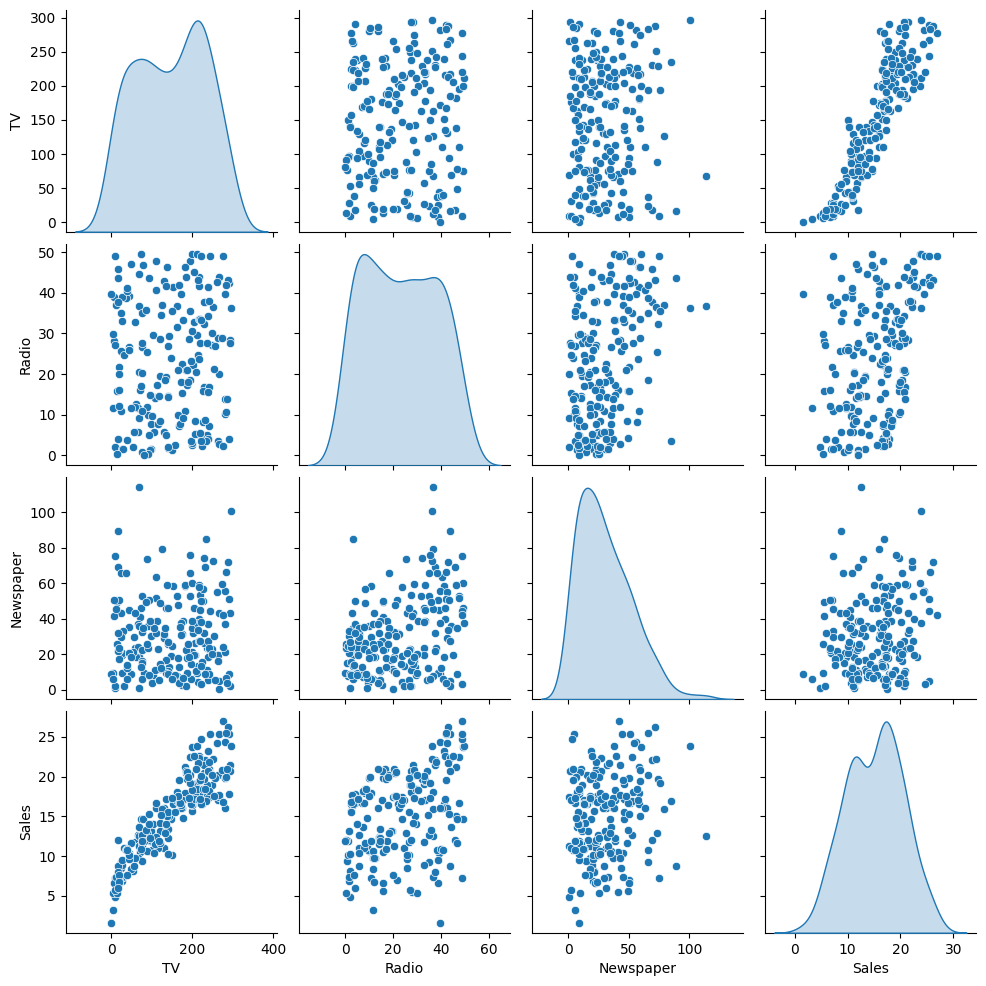

In [10]:
sns.pairplot(df, diag_kind='kde')

<Axes: xlabel='Sales', ylabel='Count'>

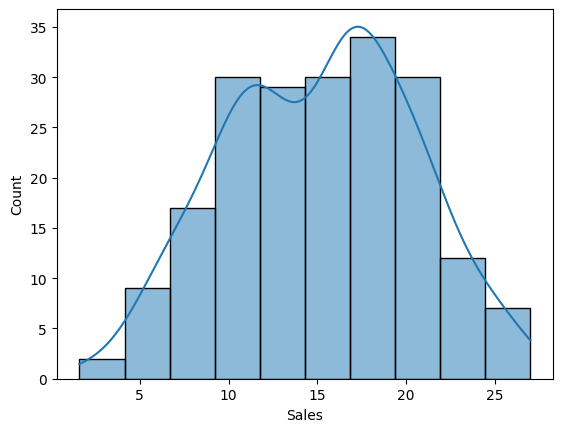

In [11]:
sns.histplot(df['Sales'] , kde=True)

C:\Users\User\AppData\Local\Temp\ipykernel_17932\4256165467.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'])


<Axes: xlabel='Sales', ylabel='Density'>

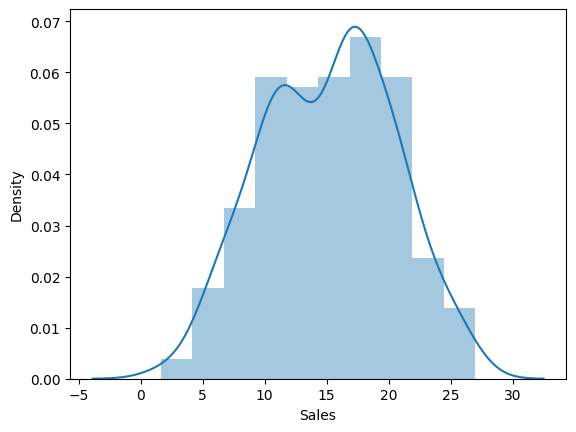

In [12]:
sns.distplot(df['Sales'])

<Axes: >

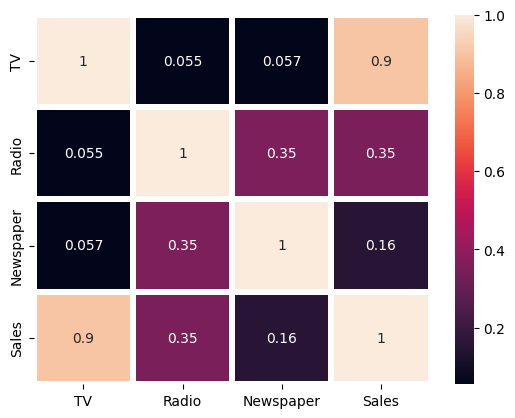

In [13]:
sns.heatmap(df.corr(),annot=True, cmap='rocket', lw=4)

# Determine the Features and the Target variables

In [14]:
X=df.drop('Sales', axis=1)
y=df.Sales

# Preprocessing

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
ploynomialConvertor = PolynomialFeatures(degree=2 , include_bias=False)

In [44]:
polyFeatures = ploynomialConvertor.fit_transform(X)

In [18]:
polyFeatures.shape

(200, 9)

# Spliting data into train and test 

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(polyFeatures, y, test_size=0.3, random_state=101)

# Train the model 

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train , y_train)

LinearRegression()

In [ ]:
model.score(X_test, y_test)*100

In [47]:
model.coef_

array([ 7.74943882e-02, -3.01295400e-02, -7.93771897e-03, -1.11245536e-04,
        5.12535556e-04, -6.47629641e-05,  1.22518214e-03,  1.43286372e-04,
        1.68151712e-04])

In [48]:
model.intercept_

5.0900587465977445

# Predciting test data

In [24]:
y_pred = model.predict(X_test)

In [25]:
pd.DataFrame({'Y_Test':y_test , 'y_pred':y_pred , 'Residuals':(y_pred-y_test) }).head()

,Y_Test,y_pred,Residuals
37,14.7,13.741787,-0.958213
109,19.8,21.114650,1.314650
31,11.9,13.032879,1.132879
89,16.7,16.329718,-0.370282
66,11.0,7.804774,-3.195226


# Evaluating the model

In [26]:
from sklearn import metrics

In [28]:
import numpy as np
MAE= metrics.mean_absolute_error(y_pred , y_test)
MSE=metrics.mean_squared_error(y_pred, y_test)
RMSE=np.sqrt(MSE)
pd.DataFrame([MAE , MSE , RMSE], index=['MAE', 'MSE', 'RMSE'] , columns=['Metrics'])

,Metrics
MAE,1.154803
MSE,2.130384
RMSE,1.459583


In [30]:
XS_train, XS_test, ys_train, ys_test = train_test_split(X, y, test_size=0.3, random_state=101)
linearmodel=LinearRegression()
linearmodel.fit(XS_train, ys_train)
ys_pred=linearmodel.predict(XS_test)

MAE_linear = metrics.mean_absolute_error(ys_test,ys_pred)
MSE_linear = metrics.mean_squared_error(ys_test,ys_pred)
RMSE_linear = np.sqrt(MSE_linear)
pd.DataFrame({'PolyMetrics':[MAE , MSE ,RMSE] , 'LinearMetrics':[MAE_linear, MSE_linear ,RMSE_linear]}, index=['MAE', 'MSE', 'RMSE'])

,PolyMetrics,LinearMetrics
MAE,1.154803,1.373120
MSE,2.130384,2.868571
RMSE,1.459583,1.693686


#  Adjusting Model Parameters

In [31]:
# Train List of RMSE per degree
train_RMSE_list=[]
#Test List of RMSE per degree
test_RMSE_list=[]

for d in range(1,10):
    
    #Preprocessing
    #create poly data set for degree (d)
    polynomial_converter= PolynomialFeatures(degree=d, include_bias=False)
    poly_features= polynomial_converter.fit(X)
    poly_features= polynomial_converter.transform(X)
    
    #Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    #Train the Model
    polymodel=LinearRegression()
    polymodel.fit(X_train, y_train)
    
    #Predicting on both Train & Test Data
    y_train_pred=polymodel.predict(X_train)
    y_test_pred=polymodel.predict(X_test)
    
    #Evaluating the Model
    
    #RMSE of Train set
    train_RMSE=np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    
    #RMSE of Test Set
    test_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    
    #Append the RMSE to the Train and Test List
    
    train_RMSE_list.append(train_RMSE)
    test_RMSE_list.append(test_RMSE)

In [ ]:
test_RMSE_list

# Plot the Polynomial degree VS RMSE

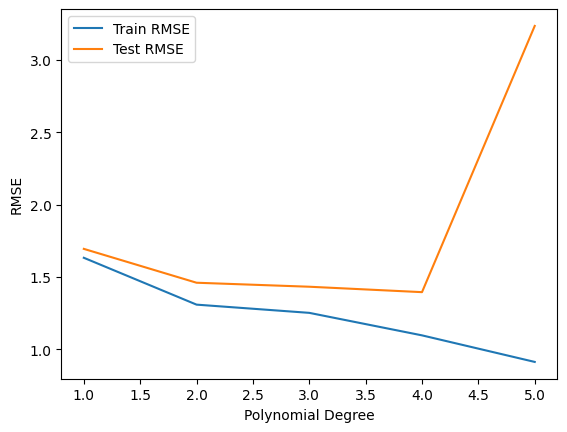

In [33]:
plt.plot(range(1,6), train_RMSE_list[:5], label='Train RMSE')
plt.plot(range(1,6), test_RMSE_list[:5], label='Test RMSE')

plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()

# Finalizing Model Parameters

In [34]:
#Create Polynomial Features
Final_Polynomial_converter= PolynomialFeatures(degree=3, include_bias=False)

Final_poly_features= Final_Polynomial_converter.fit(X)
Final_poly_features= Final_Polynomial_converter.transform(X)

#Split the DataSet
X_train, X_test, y_train, y_test = train_test_split(Final_poly_features, y, test_size=0.3, random_state=101)

#Train the model
Final_PolyModel=LinearRegression()
Final_PolyModel.fit(X_train, y_train)

LinearRegression()

# Saving the model 

In [35]:
from joblib import dump , load

In [36]:
dump(Final_PolyModel, 'Sales_Poly_Model.joblib')

['Sales_Poly_Model.joblib']

In [37]:
dump(Final_Polynomial_converter, 'Ploynomial_Converter.joblib')

['Ploynomial_Converter.joblib']

# Deployment

In [38]:
Load_Converter=load('Ploynomial_Converter.joblib')
Load_PolyModel=load('Sales_Poly_Model.joblib')

In [39]:
#Predict the sale for a campaign with advertising in TV=150, radio=25, newspaper=10
campaign=[[149,22,12]]

In [40]:
campaign_poly=Load_Converter.transform(campaign)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [43]:
Final_PolyModel.predict(campaign_poly)

array([15.71936882])